$$Diego \space Castillo \space Reyes$$

<h1 align="center">Algoritmo de estimación de fase</h1>
Crea el algoritmo de estimación de fase generalizado, varía los qubits de estimación, entre mas qubits mas preciso sera el resultado

In [1]:
import pennylane as qml
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Ask for the number of estimation qubits
n = int(input("Número de qubits de estimacion (t): "))
# define the device
dev = qml.device("default.qubit", wires=n + 1)

Debemos llegar a la expresión $e^{2 \pi i \theta k}$ por lo que el parámetro $\phi$ dentro de "qml.ControlledPhaseShift" se debe establecer como $2^k 2 \pi \theta$ y para probar que el algoritmo funciona correctamente establecemos $\theta = 0.25$

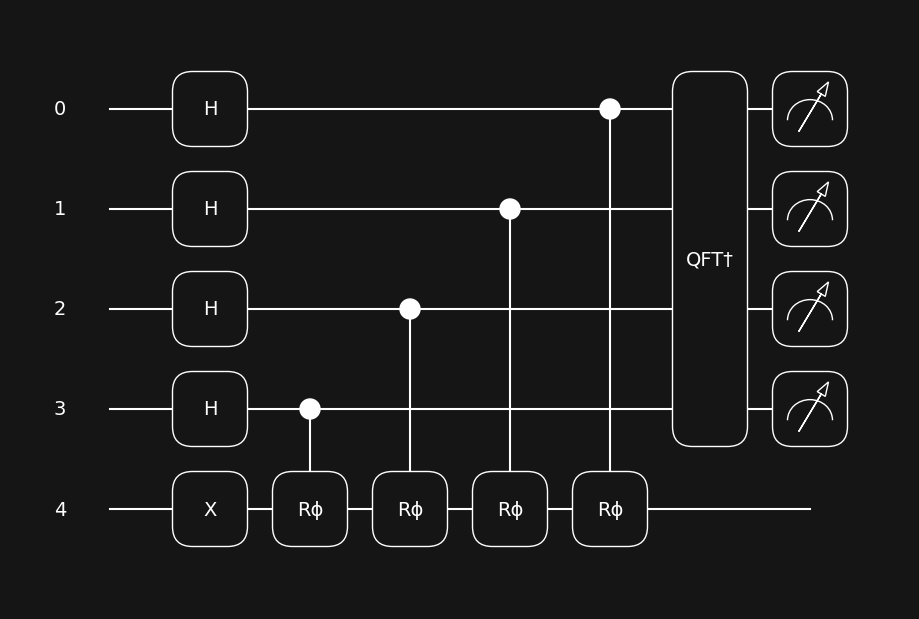

In [3]:
# define the circuit
@qml.qnode(dev)
def circuit(n):
    # Initialize the target qubit in state |1>
    qml.PauliX(wires=n)

    # create superposition on estimation qubits
    for i in range(n):
        qml.Hadamard(wires=i)

    # phaseshift gates
    k = 0
    for i in range(n - 1, -1, -1):
        qml.ControlledPhaseShift(2**k * 2 * np.pi * 0.25, wires=[i, n])
        k += 1

    # inverse QFT
    qml.adjoint(qml.QFT(wires=range(n)))

    return qml.probs(wires=range(n))

# draw the circuit
qml.drawer.use_style("black_white_dark")
fig, ax = qml.draw_mpl(circuit)(n)
plt.show()

Si obtenemos de resultado el valor que establecimos de $\theta$ o un valor aproximado significa que nuestro algoritmo esta funcionando correctamente

In [4]:
# execution of the circuit
probabilities = circuit(n)
print(probabilities.round(3))

# serch the most probable state
m = np.argmax(probabilities)
print(f"Número de qubits de conteo (t): {n}")
print("-" * 20)
print(f"El resultado más probable es el estado |{np.binary_repr(m, width=n)}⟩")
print(f"Valor entero medido (m): {m}")

# phase estimation
theta_est = m / (2**n)

print(f"Formula: θ = m / 2^t = {m} / {2**n}")
print(f"\nFase estimada (θ): {theta_est}")

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Número de qubits de conteo (t): 4
--------------------
El resultado más probable es el estado |0100⟩
Valor entero medido (m): 4
Formula: θ = m / 2^t = 4 / 16

Fase estimada (θ): 0.25
